In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
endangered_status_path = "../data/endangered_status.csv"
families_path = "../data/families.csv"
languages_path = "../data/languages.csv"

In [3]:
endangered_df = pd.read_csv(endangered_status_path)
families_df = pd.read_csv(families_path)
languages_df = pd.read_csv(languages_path)

In [4]:
df = pd.merge(languages_df, endangered_df, on="id", how='left')

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.shape[0]

8612

In [7]:
df_split = df.copy()
df_split['macroarea'] = df_split['macroarea'].str.split(";")
df_split = df_split.explode('macroarea').reset_index(drop=True)
df = df_split.copy()

In [8]:
df['macroarea'].unique()

array(['Papunesia', nan, 'South America', 'North America', 'Africa',
       'Eurasia', 'Australia'], dtype=object)

In [9]:
df.status_label.unique()

array(['shifting', 'moribund', 'not endangered', 'extinct',
       'nearly extinct', 'threatened', nan], dtype=object)

## Macroareas with most endangered languages

In [10]:
df.groupby('macroarea')['status_label'].count()


macroarea
Africa           2271
Australia         375
Eurasia          1890
North America     704
Papunesia        2123
South America     651
Name: status_label, dtype: int64

In [11]:
df1 = df.copy()

In [12]:
df1.groupby('macroarea').status_label.count()

macroarea
Africa           2271
Australia         375
Eurasia          1890
North America     704
Papunesia        2123
South America     651
Name: status_label, dtype: int64

In [29]:
exclude = ['extinct', 'not endangered', np.nan]

In [31]:
df1[~df1['status_label'].isin(exclude)]

,id,name,macroarea,latitude,longitude,iso639p3code,countries,is_isolate,family_id,status_code,status_label
0,fasu1242,Fasu,Papunesia,-6.626870,143.284000,faa,PG,True,NaN,3.0,shifting
1,wash1253,Washo,NaN,38.818400,-119.640000,was,US,True,NaN,4.0,moribund
6,else1239,Elseng,NaN,-3.001760,140.418000,mrf,ID,True,NaN,3.0,shifting
7,ando1256,Andoque,South America,-0.537510,-72.086900,ano,CO,True,NaN,5.0,nearly extinct
8,pyuu1245,Pyu,NaN,-4.450030,141.018000,pby,ID;PG,True,NaN,3.0,shifting
...,...,...,...,...,...,...,...,...,...,...,...
8607,vili1238,Vili,Africa,-4.067160,11.380400,vif,AO;CG;GA,False,atla1278,2.0,threatened
8608,hung1280,Hungu-Pombo,Africa,-9.164628,18.192062,hng,AO,False,atla1278,2.0,threatened
8614,bwis1242,Bwisi,Africa,-3.236860,11.959500,bwz,CG;GA,False,atla1278,3.0,shifting
8616,vumb1238,Vumbu,Africa,-2.176730,10.649800,vum,GA,False,atla1278,3.0,shifting


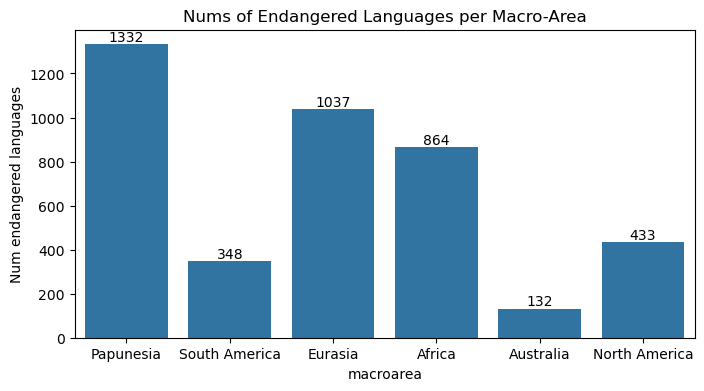

In [32]:
plt.figure(figsize=(8,4))
plt.title('Nums of Endangered Languages per Macro-Area')
plt.ylabel('Num endangered languages')
ax = sns.countplot(df1[~df1['status_label'].isin(exclude)], x='macroarea')
for container in ax.containers:
    ax.bar_label(container)

## Are Language Isolates More Likely to be Endangered

In [37]:
df.is_isolate.value_counts()

is_isolate
False    8438
True      182
Name: count, dtype: int64

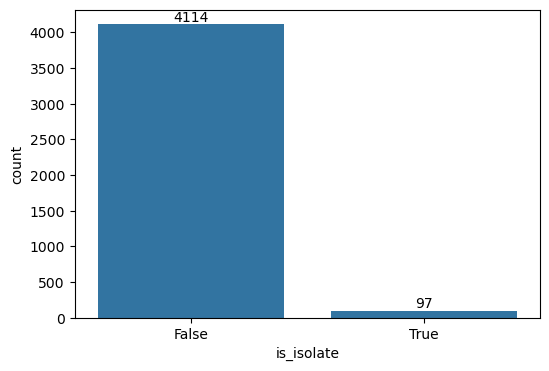

In [40]:
plt.figure(figsize=(6,4))

ax = sns.countplot(df[~df['status_label'].isin(exclude)], x='is_isolate')

for container in ax.containers:
    ax.bar_label(container)

In [51]:
true_proportion = format(97/182 * 100, ".2f")
false_proportion = format(4114/8438 * 100, ".2f")
print(f"False {false_proportion}% | True: {true_proportion}%")

False 48.76% | True: 53.30%


not really